Translation

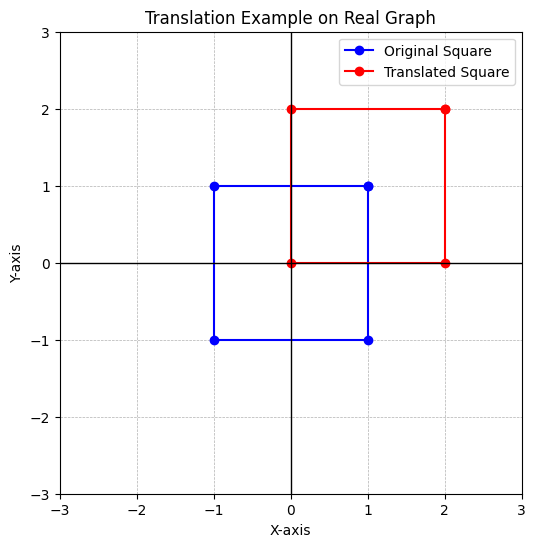

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
square = np.array([[1, 1], [1, -1], [-1, -1], [-1, 1], [1, 1]])
tx, ty = 1, 1  

# Apply translation
translated_square = square + np.array([tx, ty])
plt.figure(figsize=(6,6))
plt.plot(square[:,0], square[:,1], 'b-o', label="Original Square")
plt.plot(translated_square[:,0], translated_square[:,1], 'r-o', label="Translated Square")
plt.axhline(0, color='k', linewidth=1)
plt.axvline(0, color='k', linewidth=1)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Translation Example on Real Graph")
plt.legend()
plt.show()


Rotation

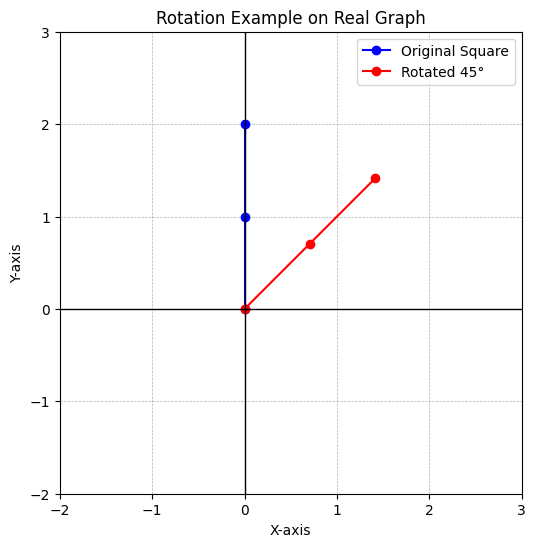

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
square = np.array([[0,0],[0,1],[0,2]])

# Rotation angle in degrees
angle_deg = 45
theta = np.deg2rad(angle_deg)   

# Rotation matrix
R = np.array([[np.cos(theta), np.sin(theta)],
              [-np.sin(theta),  np.cos(theta)]])

# Rotate square around origin
rotated_square = square @ R.T
plt.figure(figsize=(6,6))
plt.plot(square[:,0], square[:,1], 'b-o', label="Original Square")
plt.plot(rotated_square[:,0], rotated_square[:,1], 'r-o', label=f"Rotated {angle_deg}°")
plt.axhline(0, color='k', linewidth=1)
plt.axvline(0, color='k', linewidth=1)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(-2, 3)
plt.ylim(-2, 3)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Rotation Example on Real Graph")
plt.legend()
plt.show()


Rotate based on some point

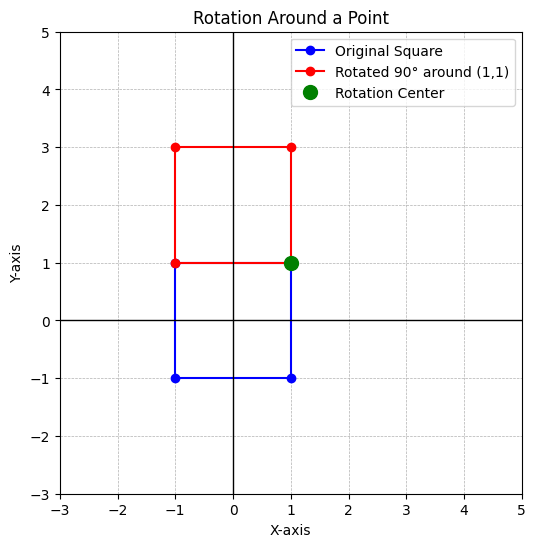

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
square = np.array([[1, 1], [1, -1], [-1, -1], [-1, 1], [1, 1]])
angle_deg = 90
theta = np.deg2rad(angle_deg)

# Rotation matrix
R = np.array([[np.cos(theta), np.sin(theta)],
              [-np.sin(theta),  np.cos(theta)]])
cx, cy = 1, 1
rotated_square = (square - np.array([cx, cy])) @ R.T + np.array([cx, cy])
plt.figure(figsize=(6,6))
plt.plot(square[:,0], square[:,1], 'b-o', label="Original Square")
plt.plot(rotated_square[:,0], rotated_square[:,1], 'r-o', label=f"Rotated {angle_deg}° around ({cx},{cy})")
plt.plot(cx, cy, 'go', markersize=10, label="Rotation Center")
plt.axhline(0, color='k', linewidth=1)
plt.axvline(0, color='k', linewidth=1)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-3, 5)
plt.ylim(-3, 5)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Rotation Around a Point")
plt.legend()
plt.show()


Rotation + Translation

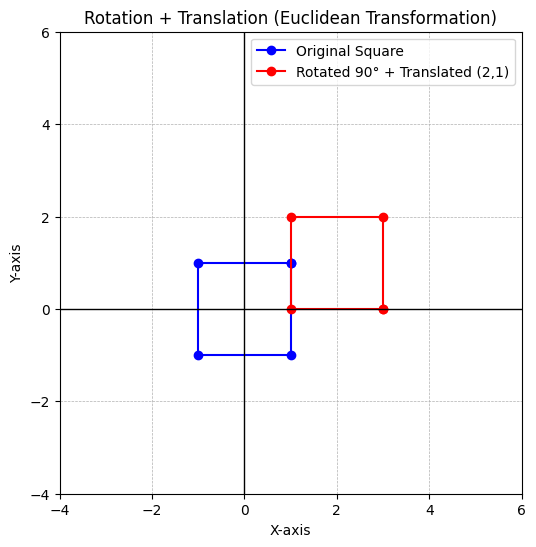

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
square = np.array([[1, 1], [1, -1], [-1, -1], [-1, 1], [1, 1]])

# Rotation angle
angle_deg = 90
theta = np.deg2rad(angle_deg)

# Rotation matrix
R = np.array([[np.cos(theta), np.sin(theta)],
              [-np.sin(theta),  np.cos(theta)]])

# Translate values
tx, ty = 2, 1   # shift right by 2, up by 1

# Step 1: Rotate around origin
rotated_square = square @ R.T

# Step 2: Apply translation
transformed_square = rotated_square + np.array([tx, ty])
plt.figure(figsize=(6,6))
plt.plot(square[:,0], square[:,1], 'b-o', label="Original Square")
plt.plot(transformed_square[:,0], transformed_square[:,1], 'r-o', 
         label=f"Rotated {angle_deg}° + Translated ({tx},{ty})")

plt.axhline(0, color='k', linewidth=1)
plt.axvline(0, color='k', linewidth=1)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-4, 6)
plt.ylim(-4, 6)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Rotation + Translation (Euclidean Transformation)")
plt.legend()
plt.show()


Homogeneous coordinates

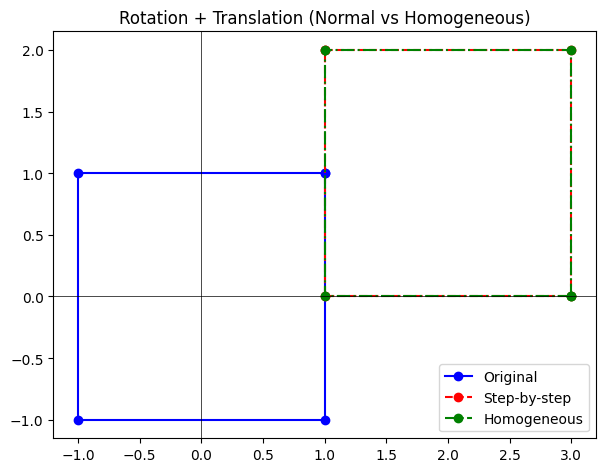

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
square = np.array([[1,1], [1, -1], [-1, -1], [-1, 1], [1, 1]])

# Parameters
angle_deg = 90
theta = np.deg2rad(angle_deg)    # 90 degree rotation
tx, ty = 2, 1       # translation (shift right 2, up 1)

# 1.Rotate then translate
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])
rotated = square @ R.T
translated_rotated = rotated + np.array([tx, ty])
# 2. Homogeneous Coordinates

square_h = np.hstack([square, np.ones((square.shape[0], 1))])

# Transformation matrix (Rotation + Translation)
T = np.array([[np.cos(theta), np.sin(theta), tx],
              [-np.sin(theta),  np.cos(theta), ty],
              [0, 0, 1]])
transformed_h = square_h @ T.T
homogeneous_result = transformed_h[:, :2] 
plt.figure(figsize=(7,7))
plt.plot(square[:,0], square[:,1], 'b-o', label="Original")
plt.plot(translated_rotated[:,0], translated_rotated[:,1], 'r--o', label="Step-by-step")
plt.plot(homogeneous_result[:,0], homogeneous_result[:,1], 'g-.o', label="Homogeneous")
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.legend()
plt.title("Rotation + Translation (Normal vs Homogeneous)")
plt.gca().set_aspect('equal')
plt.show()


Similarity Transformations

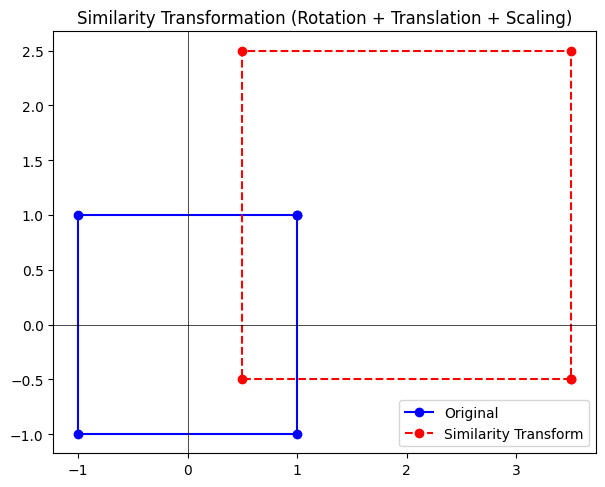

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

square = np.array([[1,1], [1,-1], [-1,-1], [-1,1], [1,1]])

# Parameters
angle_deg = 90
theta = np.deg2rad(angle_deg)  
k = 1.5             # scaling factor
tx, ty = 2, 1       # translation

# Convert to homogeneous coordinates
square_h = np.hstack([square, np.ones((square.shape[0], 1))])

# Similarity transformation matrix
S = np.array([[k*np.cos(theta), k*np.sin(theta), tx],
              [-k*np.sin(theta),  k*np.cos(theta), ty],
              [0, 0, 1]])
transformed_h = square_h @ S.T
similarity_result = transformed_h[:, :2]
plt.figure(figsize=(7,7))
plt.plot(square[:,0], square[:,1], 'b-o', label="Original")
plt.plot(similarity_result[:,0], similarity_result[:,1], 'r--o', label="Similarity Transform")
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.legend()
plt.title("Similarity Transformation (Rotation + Translation + Scaling)")
plt.gca().set_aspect('equal')
plt.show()


Affine Transformations
 

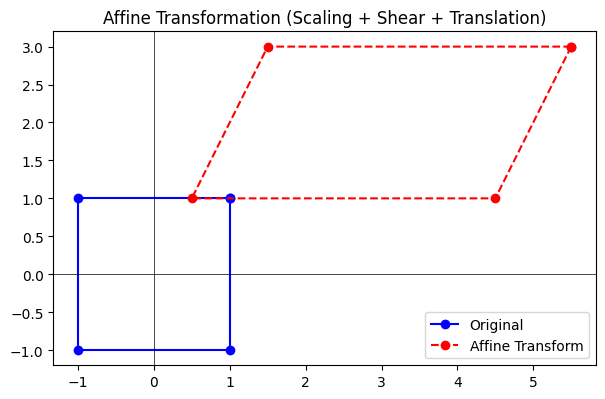

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
square = np.array([[1,1], [1,-1], [-1,-1], [-1,1], [1,1]])

# Affine transformation parameters
sx, sy = 2, 1      # non-uniform scaling
shear = 0.5        # shear factor
tx, ty = 3, 2      # translation

# Convert to homogeneous coordinates
square_h = np.hstack([square, np.ones((square.shape[0], 1))])

# Affine transformation matrix (general 2x3)
A = np.array([[sx, shear, tx],
              [0,   sy,   ty],
              [0,    0,    1]])

# Apply affine transformation
transformed_h = square_h @ A.T
affine_result = transformed_h[:, :2]
plt.figure(figsize=(7,7))
plt.plot(square[:,0], square[:,1], 'b-o', label="Original")
plt.plot(affine_result[:,0], affine_result[:,1], 'r--o', label="Affine Transform")
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.legend()
plt.title("Affine Transformation (Scaling + Shear + Translation)")
plt.gca().set_aspect('equal')
plt.show()


Projective Transformation

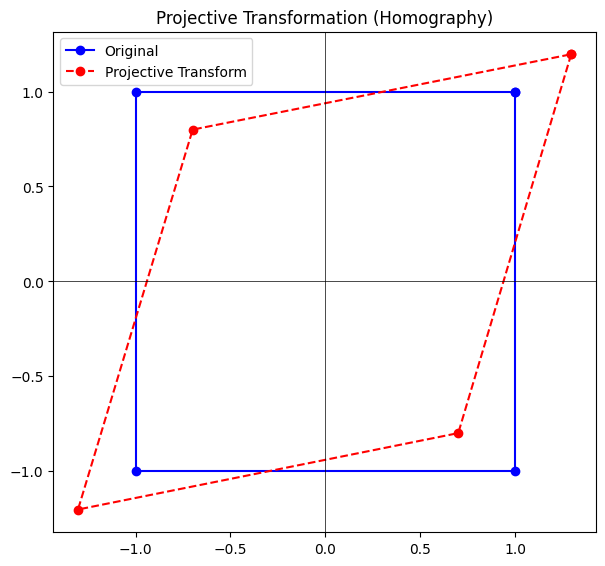

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
square = np.array([[1,1], [1,-1], [-1,-1], [-1,1], [1,1]])

# Convert to homogeneous coordinates
square_h = np.hstack([square, np.ones((square.shape[0], 1))])

#Projective Transformation matrix (Homography)
# (Last row is not [0,0,1] → makes it projective, not affine)
P = np.array([[1, 0.3, 0],
              [0.2, 1, 0],
              [0.001, 0.002, 1]])

# Apply projective transformation
transformed_h = square_h @ P.T

# Normalize by the last coordinate (w)
transformed_h /= transformed_h[:, [2]]
projective_result = transformed_h[:, :2]

plt.figure(figsize=(7,7))
plt.plot(square[:,0], square[:,1], 'b-o', label="Original")
plt.plot(projective_result[:,0], projective_result[:,1], 'r--o', label="Projective Transform")
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.legend()
plt.title("Projective Transformation (Homography)")
plt.gca().set_aspect('equal')
plt.show()
